In [1]:

import matplotlib.pyplot as plt
import matplotlib.patches as pt


In [2]:

from image import Img
from coordinates import Coordinates, ask_coordinate
from roi import Roi, ask_roi
from recognize import recognize
from rescale import crop, rescale_final_data
from output import output


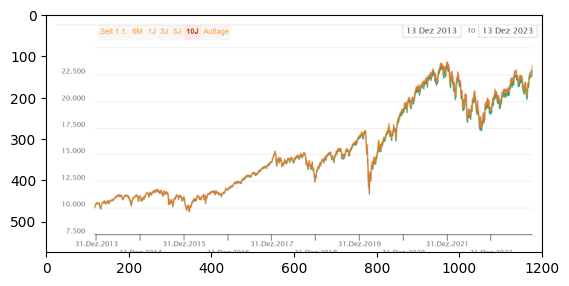

In [3]:
path = r"C:\Users\Benja\Code\Python\PlotDigitizer\data\plot digitizer test.PNG"
#read_image(path)
img = Img(path=path)
img.read_data()


#plot_image()
fig, ax = plt.subplots()
ax.imshow(img.data)
#fig.savefig(r"C:\Users\Benja\Code\Python\PlotDigitizer\data\check\temp.png")
#  noch ein grid mit den coordinaten machen?


In [4]:

# bei dem ganzen Abschnitt bin ich nicht sicher, ob es funktionirt, das linebr mit wikrlich plots speichern machen
#ask_coordinates()
all_coordinates = []
for _ in ("x1", "x2", "y1", "y2"):
    state = True
    while state:
        print("Please define the coordinate ", _, ":")
        coordinate = ask_coordinate()
        fig, ax = plt.subplots()
        if _ == "x1" or "x2":
            
            #ax..plot((coordinate["pixel"], coordinate["pixel"]), (0, img.data.data.shape[0]), color='red')
            ax.vlines(coordinate["pixel"],
                    0, img.data.data.shape[0],
                    color='red')
        else:
             ax.hlines(coordinate["pixel"], 0, img.data.data.shape[1])
        ax.imshow(img.data)
        fig.savefig(r"C:\Users\Benja\Code\Python\PlotDigitizer\data\check\temp.png")
        happy = input(f"Does this fit to your named value: {coordinate['value']} \n yes or no")
        if happy.lower() == "yes":
            state = False
            all_coordinates.append(coordinate)

coordinates = Coordinates(x1=all_coordinates[0], 
                          x2=all_coordinates[1],
                          y1=all_coordinates[2],
                          y2=all_coordinates[3])



Please define the coordinate  x1 :
Please define the coordinate  x1 :


In [ ]:

#ask_roi()
state = True
while state:
    roi = ask_roi()
    rectangle = pt.Rectangle((roi.x,roi.y), roi.width, roi.hight, facecolor='None', edgecolor='red')
    ax.add_patch(rectangle)
    ax.imshow()
    happy = input("Is this correct? \n yes ro no")
    if happy.lower() == "yes":
        state = False



In [ ]:

#crop()
crop(img, roi)

In [ ]:

#recognize_data()
final_data = recognize(img.cropped_data)

In [ ]:
final_data = rescale_final_data(final_data, coordinates)

In [ ]:
output(final_data)